In [13]:
import tensorflow as tf 
import keras 

import matplotlib.pyplot as plt 
import numpy as np 

In [14]:
# Importing convolutional neural network InceptionV3
from keras.applications.inception_v3 import InceptionV3, decode_predictions
from keras import backend as K

In [15]:
# Initialize the convolutional neural network in a variable
iv3 = InceptionV3() 

In [16]:
# Show one summery of neural nerwork 
print(iv3.summary())

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_189 (Conv2D)             (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_189 (BatchN (None, 149, 149, 32) 96          conv2d_189[0][0]                 
__________________________________________________________________________________________________
activation_189 (Activation)     (None, 149, 149, 32) 0           batch_normalization_189[0][0]    
_______________________________________________________________________________________

In [27]:
from keras.preprocessing import image

x = image.img_to_array(image.load_img("./Images/dogHack.png", target_size=(299, 299)))
# Change rank, 0-255 -> -1-1
x /= 255
x -= 0.5
x *= 2

# Sizing for Inceptionv3 
x = x.reshape([1, x.shape[0], x.shape[1], x.shape[2]])

# Adding the input value to get the output value. 
y = iv3.predict(x)

# Result, one vector with 1000 probabilities
y.shape

# Result of image prossing 
decode_predictions(y)

[[('n07747607', 'orange', 0.9970252),
  ('n07749582', 'lemon', 0.0024593356),
  ('n12620546', 'hip', 6.1561805e-05),
  ('n03720891', 'maraca', 2.711732e-05),
  ('n02099601', 'golden_retriever', 2.240498e-05)]]

### Adversary attack

In [23]:
# Adding out layer and input layer for data 

inp_layer = iv3.layers[0].input
out_layer = iv3.layers[-1].output

target_class = 950

# Creating cost function 

loss = out_layer[0, target_class]

grad = K.gradients(loss, inp_layer)[0]

optimize_gradient = K.function([inp_layer, K.learning_phase()], [grad, loss])

adv = np.copy(x)  

pert = 0.01

max_pert = x + 0.01
min_pert = x - 0.01

# Optimize cost funcion 

cost = 0.0

while cost < 0.95: 
    gr, cost = optimize_gradient([adv, 0])
    
    adv += gr
    
    adv = np.clip(adv, min_pert, max_pert)
    adv = np.clip(adv, -1, 1)
    
    print("Orange cost:", cost)
    
hacked = np.copy(adv)

Lemon cost: 5.4782347e-05
Lemon cost: 5.4978354e-05
Lemon cost: 5.5173885e-05
Lemon cost: 5.5368793e-05
Lemon cost: 5.556457e-05
Lemon cost: 5.576018e-05
Lemon cost: 5.5958142e-05
Lemon cost: 5.616044e-05
Lemon cost: 5.6363075e-05
Lemon cost: 5.6564266e-05
Lemon cost: 5.6766254e-05
Lemon cost: 5.6968183e-05
Lemon cost: 5.717195e-05
Lemon cost: 5.7377296e-05
Lemon cost: 5.7583922e-05
Lemon cost: 5.7792386e-05
Lemon cost: 5.8003672e-05
Lemon cost: 5.8217054e-05
Lemon cost: 5.8432168e-05
Lemon cost: 5.8647278e-05
Lemon cost: 5.8863065e-05
Lemon cost: 5.90806e-05
Lemon cost: 5.9298793e-05
Lemon cost: 5.9517537e-05
Lemon cost: 5.9738344e-05
Lemon cost: 5.9959842e-05
Lemon cost: 6.017958e-05
Lemon cost: 6.0401977e-05
Lemon cost: 6.0623643e-05
Lemon cost: 6.084754e-05
Lemon cost: 6.1071885e-05
Lemon cost: 6.1298626e-05
Lemon cost: 6.152567e-05
Lemon cost: 6.175416e-05
Lemon cost: 6.198353e-05
Lemon cost: 6.221205e-05
Lemon cost: 6.244293e-05
Lemon cost: 6.267394e-05
Lemon cost: 6.290572e-05
L

Lemon cost: 0.0002953575
Lemon cost: 0.00029799898
Lemon cost: 0.0003006416
Lemon cost: 0.00030326573
Lemon cost: 0.00030589636
Lemon cost: 0.0003085535
Lemon cost: 0.0003112365
Lemon cost: 0.00031393018
Lemon cost: 0.0003166519
Lemon cost: 0.0003194067
Lemon cost: 0.0003221967
Lemon cost: 0.00032502037
Lemon cost: 0.00032782755
Lemon cost: 0.00033063695
Lemon cost: 0.00033344014
Lemon cost: 0.00033626653
Lemon cost: 0.0003391286
Lemon cost: 0.00034202574
Lemon cost: 0.00034493807
Lemon cost: 0.00034787116
Lemon cost: 0.00035082985
Lemon cost: 0.0003538318
Lemon cost: 0.00035686803
Lemon cost: 0.00035992594
Lemon cost: 0.0003630023
Lemon cost: 0.00036615264
Lemon cost: 0.00036932502
Lemon cost: 0.00037254638
Lemon cost: 0.00037587236
Lemon cost: 0.00037926415
Lemon cost: 0.0003826959
Lemon cost: 0.0003861225
Lemon cost: 0.000389591
Lemon cost: 0.00039309208
Lemon cost: 0.00039658617
Lemon cost: 0.00040009487
Lemon cost: 0.0004036321
Lemon cost: 0.0004072281
Lemon cost: 0.00041088465
Le

In [24]:
adv /= 2 
adv += 0.5
adv *= 255

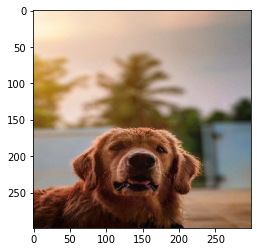

In [25]:
plt.imshow(adv[0].astype(np.uint8))
plt.show()

In [26]:
from PIL import Image 
im = Image.fromarray(adv[0].astype(np.uint8))
im.save("./Images/dogHack.png")